In [1]:
# Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Select just a few of these categories, and download the training and testing set.
categories = ['comp.windows.x', 'comp.os.ms-windows.misc', 'misc.forsale', 'rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
# Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [4]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

## Confusion Matrix

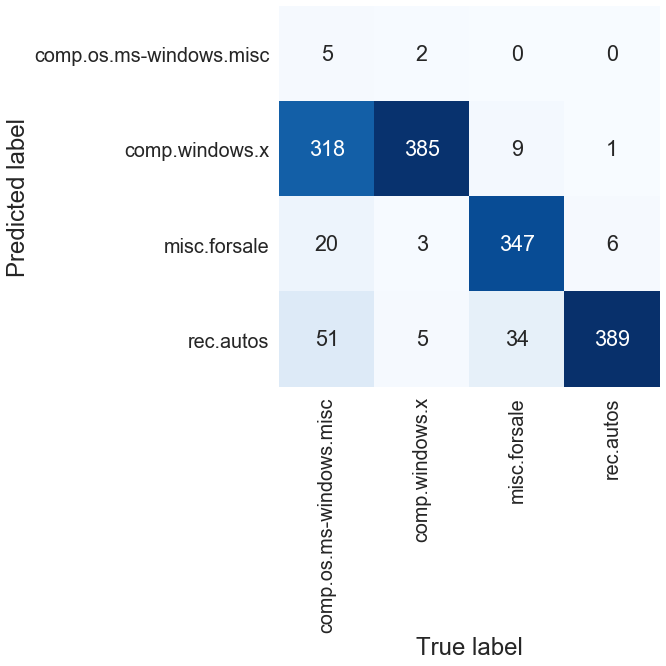

In [5]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(14,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
# Save figure
# plt.savefig("confusion_matrix_text_classification.png", dpi=600)
plt.show()

In [6]:
import numpy as np

class_cnt = np.zeros((4))
for i in range(0,len(train.target)):
    class_cnt[train.target[i]]=class_cnt[train.target[i]]+1

for i in range(0,4):
    print('%s: %d' % (train.target_names[i], class_cnt[i]))

comp.os.ms-windows.misc: 591
comp.windows.x: 593
misc.forsale: 585
rec.autos: 594


In [7]:
class Object(object):
    pass

train_aux = Object()
train_aux.data = []
train_aux.target = []
train_aux.filenames =[]
train_aux.target_names =[]
cnt = 0
for i in range(0,len(train.target)):
    if(train.target[i]==0 and cnt < 300):
        train_aux.data.append(train.data[i])
        train_aux.target.append(train.target[i])
        train_aux.filenames.append(train.filenames[i])
        cnt = cnt + 1
    elif(train.target[i]!=0):
        train_aux.data.append(train.data[i])
        train_aux.target.append(train.target[i])
        train_aux.filenames.append(train.filenames[i])

train_aux.target_names = train.target_names
train = train_aux

print(cnt)

300


In [8]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
# Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [9]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

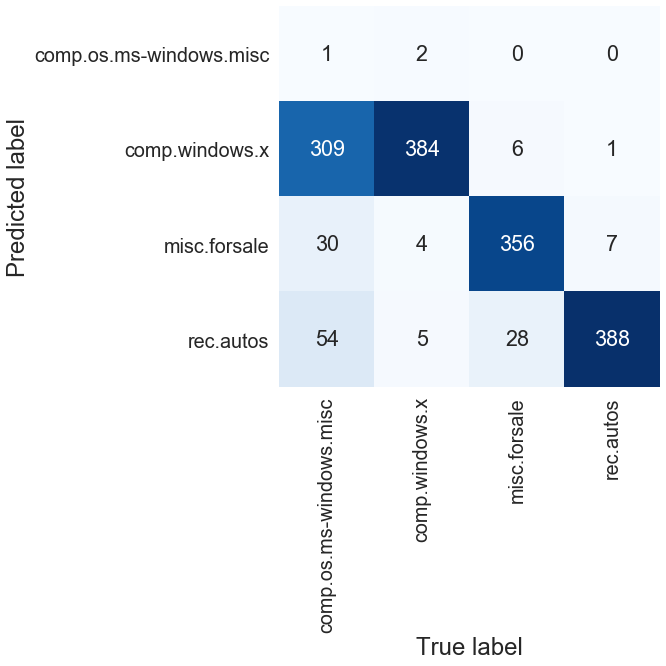

In [10]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

In [11]:
import numpy as np

class_cnt = np.zeros((4))
for i in range(0,len(train.target)):
    class_cnt[train.target[i]]=class_cnt[train.target[i]]+1

for i in range(0,4):
    print('%s: %d' % (train.target_names[i], class_cnt[i]))

comp.os.ms-windows.misc: 300
comp.windows.x: 593
misc.forsale: 585
rec.autos: 594
